In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use(style='ggplot')
import seaborn as sns
#%matplotlib inline

credit_data = pd.read_csv('resources/UCI_Credit_Card.csv', sep=',') 
credit_data



,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,1,20000.0,2,2,1,24,2,2,-1,-1,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,29996,220000.0,1,3,1,39,0,0,0,0,...,88004.0,31237.0,15980.0,8500.0,20000.0,5003.0,3047.0,5000.0,1000.0,0
29996,29997,150000.0,1,3,2,43,-1,-1,-1,-1,...,8979.0,5190.0,0.0,1837.0,3526.0,8998.0,129.0,0.0,0.0,0
29997,29998,30000.0,1,2,2,37,4,3,2,-1,...,20878.0,20582.0,19357.0,0.0,0.0,22000.0,4200.0,2000.0,3100.0,1
29998,29999,80000.0,1,3,1,41,1,-1,0,0,...,52774.0,11855.0,48944.0,85900.0,3409.0,1178.0,1926.0,52964.0,1804.0,1


In [35]:
credit_data
credit_data.info()
print(credit_data.isnull().sum())

# Conclusion from running this code is that there are no non-null entries

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ID                          30000 non-null  int64  
 1   LIMIT_BAL                   30000 non-null  float64
 2   SEX                         30000 non-null  int64  
 3   EDUCATION                   30000 non-null  int64  
 4   MARRIAGE                    30000 non-null  int64  
 5   AGE                         30000 non-null  int64  
 6   PAY_0                       30000 non-null  int64  
 7   PAY_2                       30000 non-null  int64  
 8   PAY_3                       30000 non-null  int64  
 9   PAY_4                       30000 non-null  int64  
 10  PAY_5                       30000 non-null  int64  
 11  PAY_6                       30000 non-null  int64  
 12  BILL_AMT1                   30000 non-null  float64
 13  BILL_AMT2                   300

In [36]:
# Codes 5 and 6 are unknowns for education in Metadata
print(credit_data['EDUCATION'].value_counts())

EDUCATION
2    14030
1    10585
3     4917
5      280
4      123
6       51
0       14
Name: count, dtype: int64


In [37]:
# SEX - No missing data for the sex category
print(credit_data['SEX'].value_counts())

SEX
2    18112
1    11888
Name: count, dtype: int64


In [38]:
# MARRIAGE - 54 instances coded as 0
print(credit_data['MARRIAGE'].value_counts())

MARRIAGE
2    15964
1    13659
3      323
0       54
Name: count, dtype: int64


In [39]:
# Data Cleaning
# MARRIAGE - Drop Code 0
credit_data = credit_data.drop(credit_data[credit_data["MARRIAGE"] == 0].index)

# EDUCATION - Drop codes 5 and 6
credit_data = credit_data.drop(credit_data[credit_data["EDUCATION"] == 5].index)
credit_data = credit_data.drop(credit_data[credit_data["EDUCATION"] == 6].index)
credit_data


,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,1,20000.0,2,2,1,24,2,2,-1,-1,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,29996,220000.0,1,3,1,39,0,0,0,0,...,88004.0,31237.0,15980.0,8500.0,20000.0,5003.0,3047.0,5000.0,1000.0,0
29996,29997,150000.0,1,3,2,43,-1,-1,-1,-1,...,8979.0,5190.0,0.0,1837.0,3526.0,8998.0,129.0,0.0,0.0,0
29997,29998,30000.0,1,2,2,37,4,3,2,-1,...,20878.0,20582.0,19357.0,0.0,0.0,22000.0,4200.0,2000.0,3100.0,1
29998,29999,80000.0,1,3,1,41,1,-1,0,0,...,52774.0,11855.0,48944.0,85900.0,3409.0,1178.0,1926.0,52964.0,1804.0,1


In [40]:
# Create a copy of the dataset for heatmap
credit_data_heatmap = credit_data.copy()

In [41]:
# Create bins for Age Groups: 
bins = [20,25,30,35,40,45,50,55,60,65,70,75,80]
bin_labels = ['20-24', '25-29', '30-34', '35-39', '40-44', '45-49', '50-54', '55-59', '60-64', '65-69', '70-74', '75-79']
credit_data["AGE_GROUP"] = pd.cut(credit_data["AGE"], bins, right=False, labels = bin_labels) 
print(credit_data['AGE_GROUP'].value_counts())
print(credit_data['LIMIT_BAL'].max())


# Create bins for limit balances
bins = [0,50000,100000,150000,200000,250000,300000,350000,400000,450000,500000,550000,600000,650000,700000,750000,800000,850000,900000,950000,1000001]
bin_labels = ['0-49999', '50000-99999', '100000-149999', '150000-199999', '200000-249999', '250000-299999', '300000-349999', '350000-399999', '400000-449999', '450000-499999', '500000-549999', '550000-599999', '600000-649999', '650000-699999', '700000-749999', '750000-799999','800000-849999', '850000-899999','900000-949999', '950000<']
credit_data["LIMIT_BAL_GROUP"] = pd.cut(credit_data["LIMIT_BAL"], bins, right=False, labels = bin_labels) 
print(credit_data['LIMIT_BAL_GROUP'].value_counts())

AGE_GROUP
25-29    6867
30-34    6006
35-39    5097
40-44    3806
20-24    2651
45-49    2553
50-54    1594
55-59     706
60-64     227
65-69      83
70-74      21
75-79       4
Name: count, dtype: int64
1000000.0
LIMIT_BAL_GROUP
50000-99999      7060
0-49999          4254
200000-249999    4018
100000-149999    3798
150000-199999    3489
250000-299999    1927
300000-349999    1515
350000-399999    1497
500000-549999     772
400000-449999     675
450000-499999     461
550000-599999      54
600000-649999      50
700000-749999      21
650000-699999      14
750000-799999       7
800000-849999       2
950000<             1
850000-899999       0
900000-949999       0
Name: count, dtype: int64


The next few tables are trying to show the demographic indicators that show and increase probability in defaulting.

In [42]:
# The mean is the percentage that defaulted in the next month
# Count is the number in that group, sum is the number of defaulters in that group

# ANALYSIS - Risk of defaulting is high for youngest age group but decreases to the 30-34 age group, before rising again. 
# Small sample size above 65 years.

age_analysis = credit_data.groupby("AGE_GROUP")["default.payment.next.month"].agg(["count", "sum", "mean"]).reset_index()
age_analysis

C:\Users\User\AppData\Local\Temp\ipykernel_1764\3482451562.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_analysis = credit_data.groupby("AGE_GROUP")["default.payment.next.month"].agg(["count", "sum", "mean"]).reset_index()


,AGE_GROUP,count,sum,mean
0,20-24,2651,727,0.274236
1,25-29,6867,1463,0.213048
2,30-34,6006,1171,0.194972
3,35-39,5097,1100,0.215813
4,40-44,3806,858,0.225434
5,45-49,2553,611,0.239326
6,50-54,1594,395,0.247804
7,55-59,706,184,0.260623
8,60-64,227,68,0.299559
9,65-69,83,21,0.253012


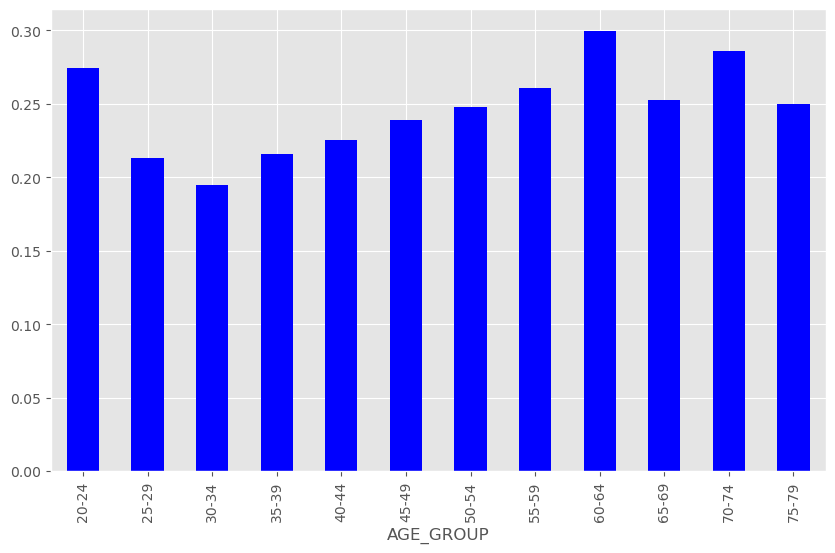

In [43]:
# ANALYSIS - Ages 30-34 have the lowest rate of defaulting, while overall the age group 25-39 have the lowest default rate
age_analysis.plot(x='AGE_GROUP', y='mean', kind='bar', legend=False, color='blue', figsize=(10,6));



In [44]:
# SEX: 1 is male, 2 is female
# The mean is the percentage that defaulted in the next month
# ANALYSIS - Males are more likely to default than females.
sex_analysis = credit_data.groupby("SEX")["default.payment.next.month"].agg(["count", "sum", "mean"])
sex_analysisP = sex_analysis.reset_index()      #created a plot table
sex_analysisP['MF'] = ['M','F']
sex_analysisP

,SEX,count,sum,mean,MF
0,1,11754,2861,0.243406,M
1,2,17861,3744,0.209619,F


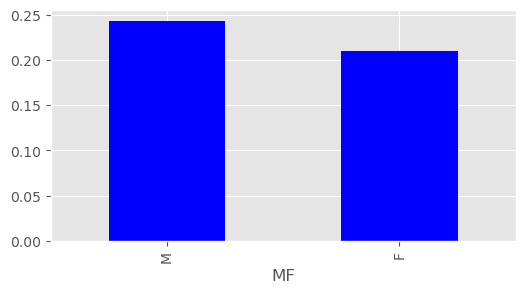

In [45]:
sex_analysisP.plot(x='MF', y='mean', kind='bar', legend=False, color='blue', figsize=(6,3));

In [46]:
# EDUCATION: 0 assume less than a high school degree, 1 is graduate school, 2 is university degree, 3 is high school, 4 is others
# The mean is the percentage that defaulted in the next month
# # ANALYSIS - One easy trend to notice here is that the higher the education, the less likely to default
education_analysis = credit_data.groupby("EDUCATION")["default.payment.next.month"].agg(["count", "sum", "mean"])
education_analysis

,count,sum,mean
EDUCATION,,,
0,14,0,0.000000
1,10581,2036,0.192420
2,14024,3329,0.237379
3,4873,1233,0.253027
4,123,7,0.056911


<Axes: xlabel='EDUCATION'>

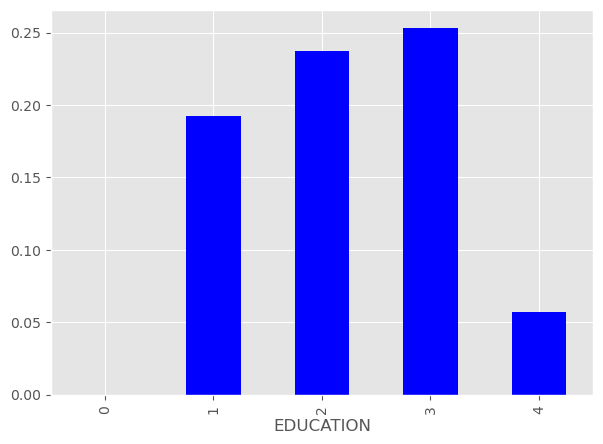

In [47]:
education_analysisP = education_analysis.reset_index()
education_analysisP.plot(x='EDUCATION', y='mean', kind='bar', color='blue', figsize=(7,5), legend=False)

In [48]:
# MARRIAGE:  1 = married, 2 = single, 3 = others
marital_analysis = credit_data.groupby("MARRIAGE")["default.payment.next.month"].agg(["count", "sum", "mean"])
marital_analysis

,count,sum,mean
MARRIAGE,,,
1,13481,3192,0.236778
2,15816,3329,0.210483
3,318,84,0.264151


<Axes: xlabel='MARRIAGE'>

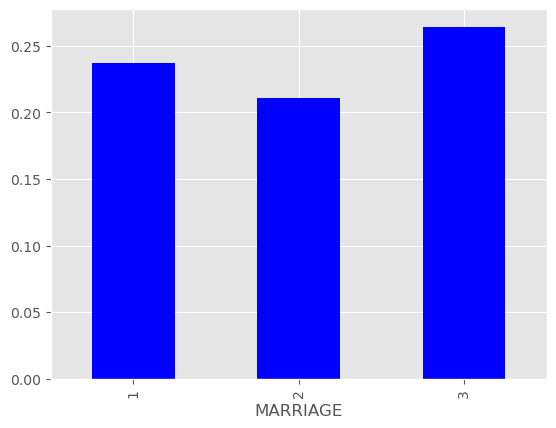

In [49]:
marital_analysis['mean'].plot(kind='bar', color = "blue")

In [50]:
# MARRIAGE + EDUCATION
# ANALYSIS -  married and less education correlates with likely hood of defaulting
marital_education_analysis = credit_data.groupby(["MARRIAGE", "EDUCATION"])["default.payment.next.month"].agg(["count", "sum", "mean"])
marital_education_analysis

count   sum      mean
MARRIAGE EDUCATION                       
1        0              4     0  0.000000
         1           3722   769  0.206609
         2           6842  1666  0.243496
         3           2861   754  0.263544
         4             52     3  0.057692
2        0             10     0  0.000000
         1           6809  1254  0.184168
         2           7020  1619  0.230627
         3           1909   452  0.236773
         4             68     4  0.058824
3        1             50    13  0.260000
         2            162    44  0.271605
         3            103    27  0.262136
         4              3     0  0.000000

<Axes: xlabel='MARRIAGE,EDUCATION'>

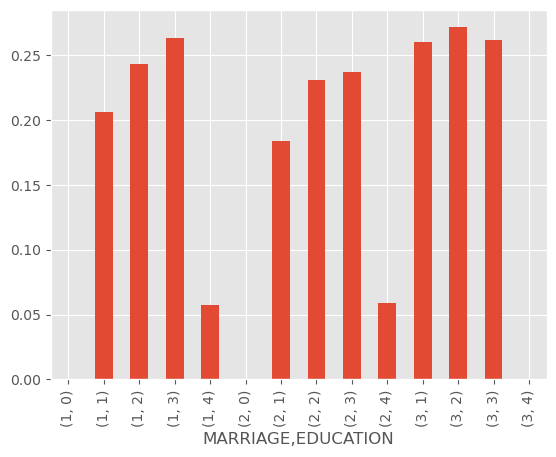

In [51]:
marital_education_analysis['mean'].plot(kind='bar')

In [52]:
# MARRIAGE + SEX
# ANALYSIS - married men are more likely to default, single women are the least likely to default
marital_sex_analysis = credit_data.groupby(["MARRIAGE", "SEX"])["default.payment.next.month"].agg(["count", "sum", "mean"])
marital_sex_analysis

count   sum      mean
MARRIAGE SEX                       
1        1     5128  1338  0.260920
         2     8353  1854  0.221956
2        1     6496  1483  0.228294
         2     9320  1846  0.198069
3        1      130    40  0.307692
         2      188    44  0.234043

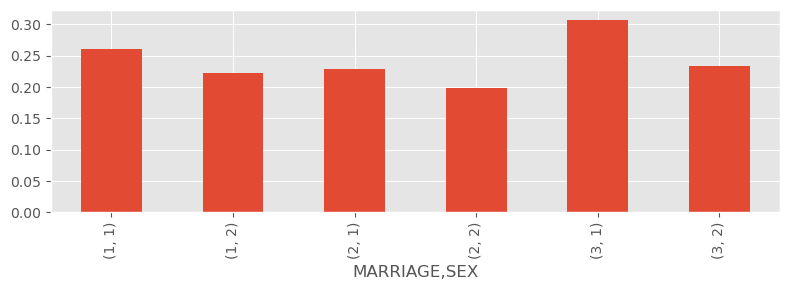

In [53]:
marital_sex_analysis1 = marital_sex_analysis #.reset_index()
marital_sex_analysis1['mean'].plot(subplots=False, kind='bar', figsize = (8, 3))
plt.tight_layout()
plt.show()


In [54]:
# ANALYSIS - Young men are prone to default
marital_sex_analysis = credit_data.groupby(["AGE_GROUP", "SEX"])["default.payment.next.month"].agg(["count", "sum", "mean"])
marital_sex_analysis

C:\Users\User\AppData\Local\Temp\ipykernel_1764\108412079.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  marital_sex_analysis = credit_data.groupby(["AGE_GROUP", "SEX"])["default.payment.next.month"].agg(["count", "sum", "mean"])


count  sum      mean
AGE_GROUP SEX                      
20-24     1      764  232  0.303665
          2     1887  495  0.262321
25-29     1     2483  555  0.223520
          2     4384  908  0.207117
30-34     1     2417  523  0.216384
          2     3589  648  0.180552
35-39     1     2106  525  0.249288
          2     2991  575  0.192243
40-44     1     1595  393  0.246395
          2     2211  465  0.210312
45-49     1     1137  293  0.257696
          2     1416  318  0.224576
50-54     1      715  204  0.285315
          2      879  191  0.217292
55-59     1      360   88  0.244444
          2      346   96  0.277457
60-64     1      119   31  0.260504
          2      108   37  0.342593
65-69     1       45   13  0.288889
          2       38    8  0.210526
70-74     1       10    3  0.300000
          2       11    3  0.272727
75-79     1        3    1  0.333333
          2        1    0  0.000000

In [55]:
marital_sex_analysis = credit_data.groupby(["AGE_GROUP", "MARRIAGE"])["default.payment.next.month"].agg(["count", "sum", "mean"])
marital_sex_analysis

C:\Users\User\AppData\Local\Temp\ipykernel_1764\2419288880.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  marital_sex_analysis = credit_data.groupby(["AGE_GROUP", "MARRIAGE"])["default.payment.next.month"].agg(["count", "sum", "mean"])


count   sum      mean
AGE_GROUP MARRIAGE                       
20-24     1           279    89  0.318996
          2          2362   635  0.268840
          3            10     3  0.300000
25-29     1          1176   297  0.252551
          2          5667  1159  0.204517
          3            24     7  0.291667
30-34     1          2290   500  0.218341
          2          3687   665  0.180363
          3            29     6  0.206897
35-39     1          3159   707  0.223805
          2          1893   385  0.203381
          3            45     8  0.177778
40-44     1          2703   602  0.222716
          2          1041   239  0.229587
          3            62    17  0.274194
45-49     1          1894   467  0.246568
          2           589   127  0.215620
          3            70    17  0.242857
50-54     1          1171   302  0.257899
          2           380    77  0.202632
          3            43    16  0.372093
55-59     1           536   148  0.276119
          2           142    27  0.190141
          3            28     9  0.321429
60-64     1           182    55  0.302198
          2            39    12  0.307692
          3             6     1  0.166667
65-69     1            68    18  0.264706
          2            14     3  0.214286
          3             1     0  0.000000
70-74     1            19     6  0.315789
          2             2     0  0.000000
          3             0     0       NaN
75-79     1             4     1  0.250000
          2             0     0       NaN
          3             0     0       NaN

In [56]:
# SEX + EDUCATION
# ANALYSIS - Male with less education correlates with higher rates of default
sex_education_analysis = credit_data.groupby(["SEX", "EDUCATION"])["default.payment.next.month"].agg(["count", "sum", "mean"])
sex_education_analysis

count   sum      mean
SEX EDUCATION                       
1   0              8     0  0.000000
    1           4353   906  0.208132
    2           5373  1408  0.262051
    3           1978   543  0.274520
    4             42     4  0.095238
2   0              6     0  0.000000
    1           6228  1130  0.181439
    2           8651  1921  0.222055
    3           2895   690  0.238342
    4             81     3  0.037037

<Axes: xlabel='SEX,EDUCATION'>

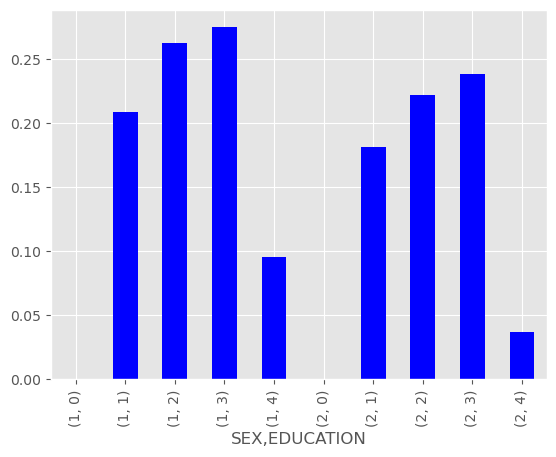

In [57]:
sex_education_analysis['mean'].plot(kind='bar', color='blue')

The next analysis is not about financial indicators that correlate with defaulting.

In [58]:
# ANALYSIS - People with lower limit balances have a higher rate of defaulting
limit_analysis = credit_data.groupby(["LIMIT_BAL_GROUP"])["default.payment.next.month"].agg(["count", "sum", "mean"])
limit_analysis

C:\Users\User\AppData\Local\Temp\ipykernel_1764\490508859.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  limit_analysis = credit_data.groupby(["LIMIT_BAL_GROUP"])["default.payment.next.month"].agg(["count", "sum", "mean"])


,count,sum,mean
LIMIT_BAL_GROUP,,,
0-49999,4254,1549,0.364128
50000-99999,7060,1848,0.261756
100000-149999,3798,906,0.238547
150000-199999,3489,621,0.177988
200000-249999,4018,696,0.173221
250000-299999,1927,286,0.148417
300000-349999,1515,220,0.145215
350000-399999,1497,232,0.154977
400000-449999,675,83,0.122963


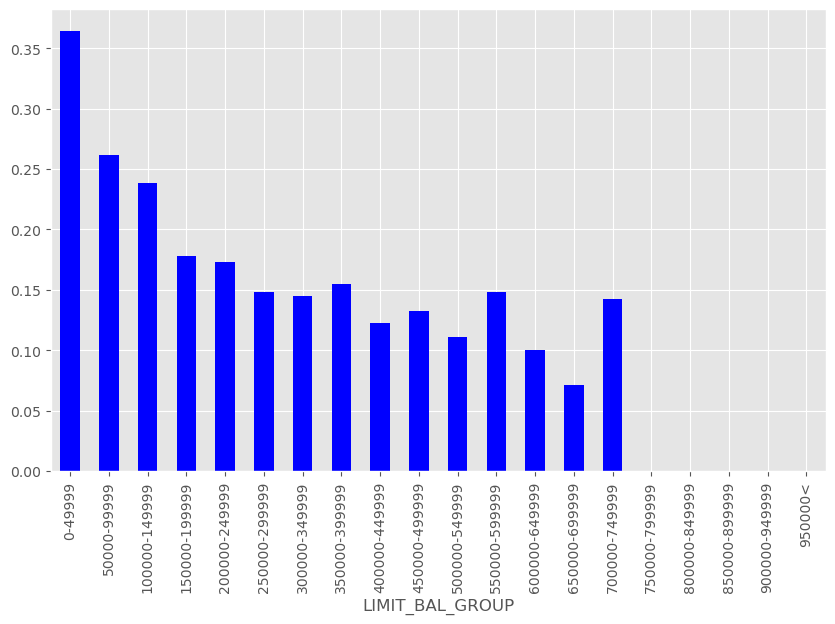

In [59]:
histLimit = limit_analysis.reset_index()
histLimit.plot(x='LIMIT_BAL_GROUP', y='mean', kind='bar', legend=False, color='blue', figsize=(10,6));

# Analysis - Heatmap


#### 1.  Diagonal Line (Self-correlation)
*   The diagonal line from the top-left to the bottom-right is dark red with a correlation of 1. This represents the correlation of each variable with itself.

#### 2.  LIMIT_BAL (Credit Limit)
*   LIMIT_BAL is negatively correlated with PAY_0, PAY_2, PAY_3, PAY_4, PAY_5, and PAY_6 (repayment status variables). This indicates that clients with higher credit limits tend to have better repayment status (lower values in PAY_X indicate timely payments).
*   It shows a moderate positive correlation with AGE.

#### 3.  Repayment Status Variables (PAY_0 to PAY_6)
*   These variables have strong positive correlations with each other (e.g., PAY_0 with PAY_2, PAY_3, etc.). This suggests that clients who miss payments in one month are likely to miss payments in other months as well.
*   These variables also show a moderate positive correlation with the target variable default.payment.next.month, indicating that delayed payments in previous months are associated with a higher likelihood of default.

#### 4.  Billing Amounts (BILL_AMT1 to BILL_AMT6)
*   These variables are highly correlated with each other, which makes sense as the bill amounts from one month to the next are likely to be similar.
*   They also show a moderate positive correlation with LIMIT_BAL, indicating that clients with higher credit limits also tend to have higher bill amounts.

#### 5.  Payment Amounts (PAY_AMT1 to PAY_AMT6)
*   Similar to billing amounts, the payment amounts are highly correlated with each other.

#### 6.  Default Payment Next Month (default.payment.next.month)
*   The target variable default.payment.next.month is positively correlated with the repayment status variables (PAY_0 to PAY_6), indicating that delayed payments increase the likelihood of default.
*   It has a slight negative correlation with LIMIT_BAL, suggesting that clients with higher credit limits are somewhat less likely to default.

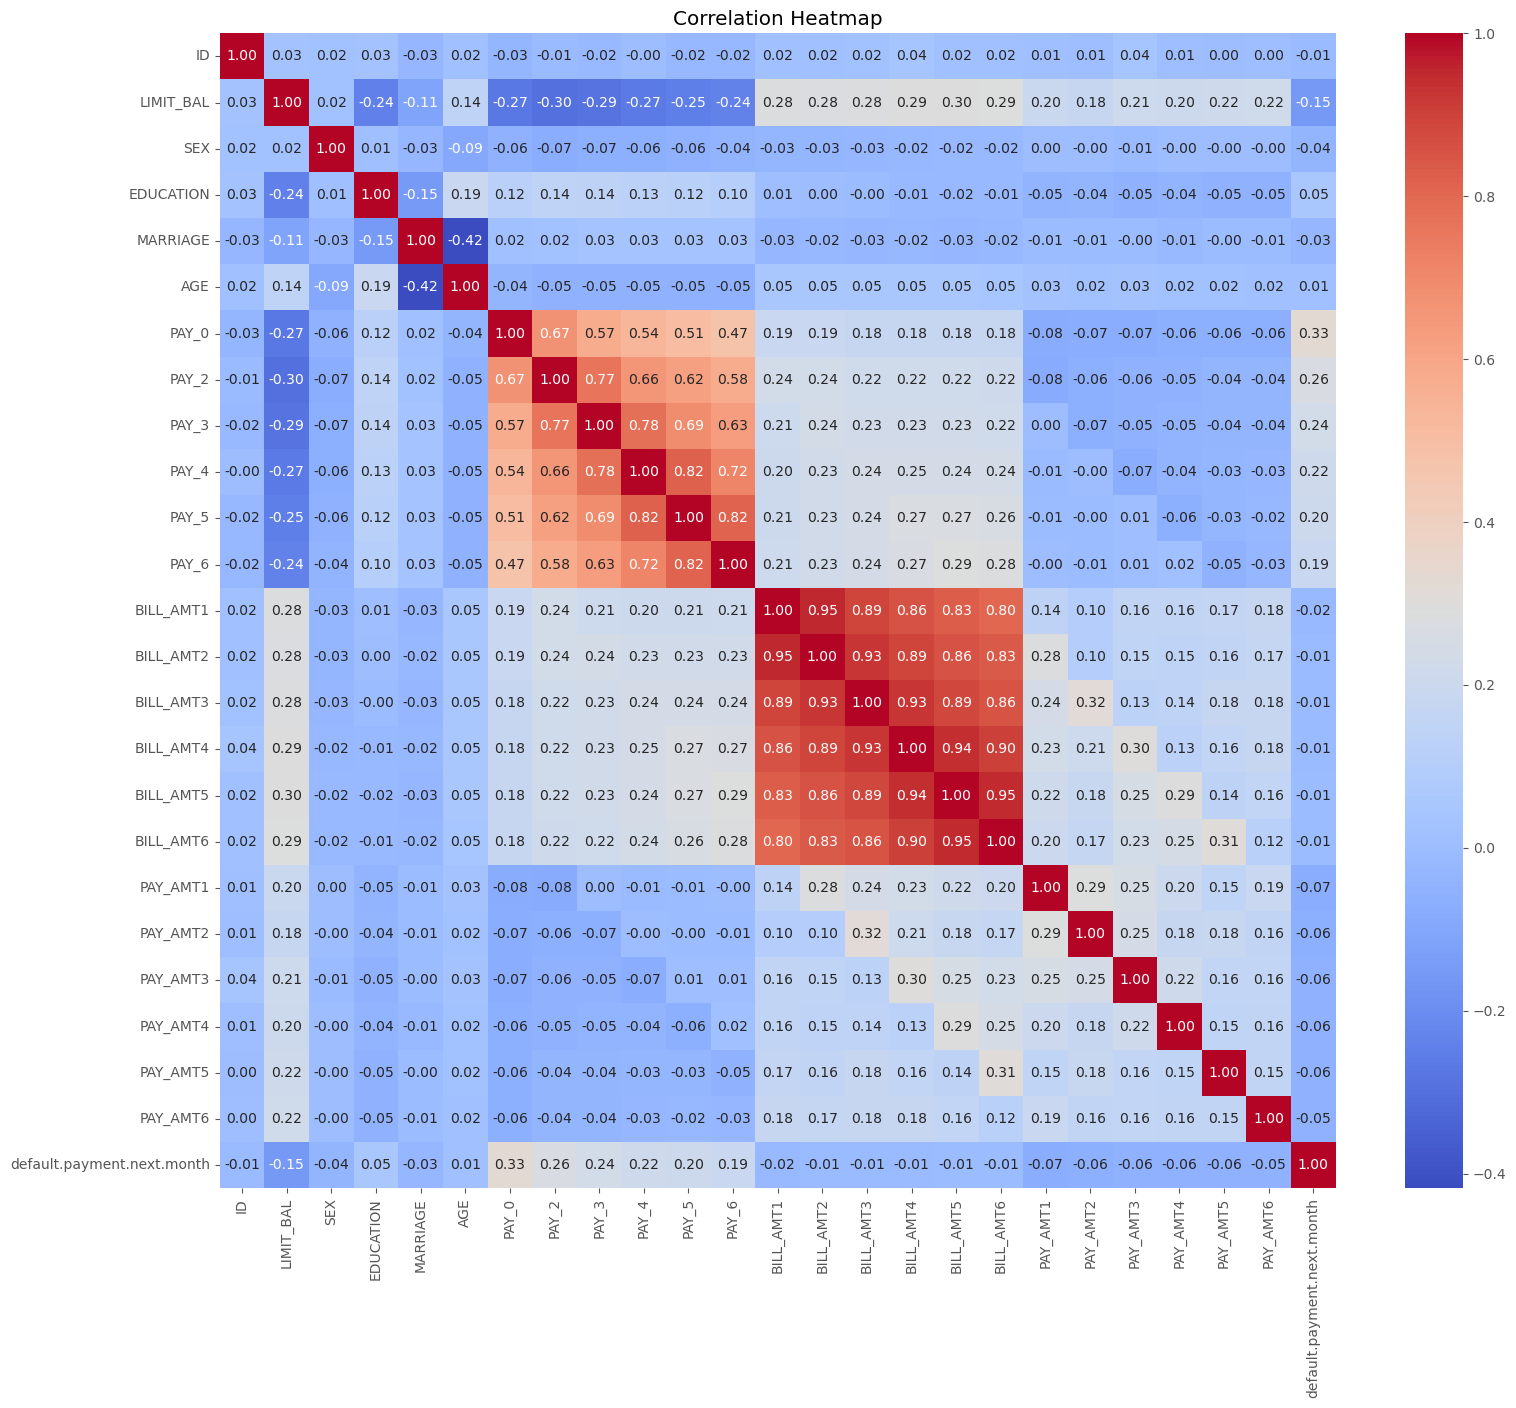

In [62]:
corr = credit_data_heatmap.corr()
plt.figure(figsize=(18, 15))
sns.heatmap(corr, annot=True, fmt=".2f", cmap="coolwarm")
plt.title('Correlation Heatmap')
plt.show()